# Notebook for Exploring and Standardizing Environmental suitability for Zika


- Data is georeferenced aggregated to province level (Zonalstatistics were computed in QGIS  instead of pure Python)

- Data compromises of monthly fluctuations of geographic ranges for Aedes aegypti and Aedes albopictus mosquitoes



#### Dataset is provided by Oliver Brady and Moritz Kraemer

Related Published papers: 

- Messina, J. P. et al. (2016). Mapping global environmental suitability for Zika virus. eLife 5, e15272. https://elifesciences.org/content/5/e15272

- Bogoch et al. (2016): doi: 10.1016/S1473-3099(16)30270-5. Potential for Zika virus introduction and transmission in resource-limited countries in Africa and the Asia-Pacific region: a modelling study.  Lancet Infect Dis. http://www.ncbi.nlm.nih.gov/pubmed/27593584



In [1]:
%matplotlib inline
# Import libraries for geomatics
import geopandas as gp

# Import libraries for visualization
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

# Import libraries for visualization
import seaborn as sns
sns.set_style('white')
sns.set_palette('deep')
plt.rcParams['figure.figsize'] = 10, 4

In [2]:
shapefile = 'raw_data/shapefile/QGIS_zonalstats_results/Provinces_zonalstatistics_monthly.shp'
df_shapefile_provinces = gp.GeoDataFrame.from_file(shapefile)

In [3]:
df_shapefile_provinces.columns

Index([ u'10Aegypti', u'10Albopict', u'10combi_me',  u'11Aegypti',
       u'11Albopict', u'11combined',  u'12Aegypti', u'12Albopict',
       u'12combined',   u'1Aegypti',
       ...
       u'sameascity',  u'scalerank',     u'sov_a3',   u'sub_code',
             u'type',    u'type_en',  u'wikipedia',     u'woe_id',
        u'woe_label',   u'woe_name'],
      dtype='object', length=102)

#### Filter out relevant properties from raw shapefile

In [4]:
cols = ['adm0_a3', 'admin',  'geometry', 'perc_pover', 'population']
col_Zika = filter(lambda k: ('Aegypti' in k) or ('Albopi' in k) or  ('combi' in k) or ('Messina' in k), df_shapefile_provinces.columns.tolist())

In [5]:
cols.extend(col_Zika)
df_shapefile_provinces = df_shapefile_provinces[cols]
df_shapefile_provinces.rename(columns={'admin': 'country'},inplace=True )

df_shapefile_provinces.head(3)
print 'Removed elements for cleaning Nan: ', len(df_shapefile_provinces[df_shapefile_provinces.isnull().any(axis=1)])
#### Drop minor islands where no values are in raster data 
df_shapefile_provinces.dropna(axis=0, how='any', inplace=True)
# Reset index to 0, 1, 2, 3...
df_shapefile_provinces.reset_index(drop=True, inplace=True)
print 'Number of remaining provinces after first data cleaning:', len(df_shapefile_provinces)

Removed elements for cleaning Nan:  189
Number of remaining provinces after first data cleaning: 4458


#### Basic exploration of raw data

1. Histograms to demonstrate distribution of data

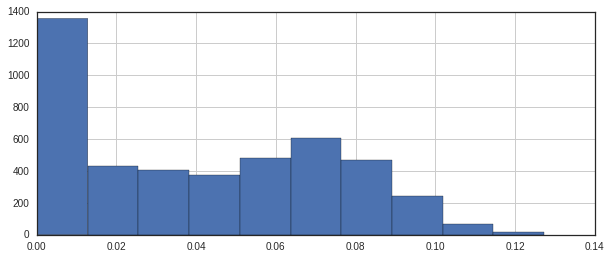

In [6]:
df_shapefile_provinces['combi_year'].hist();

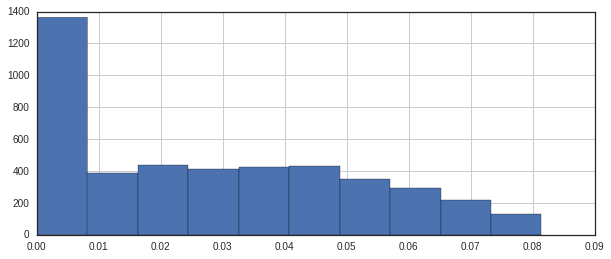

In [7]:
df_shapefile_provinces['Albopi_yea'].hist();

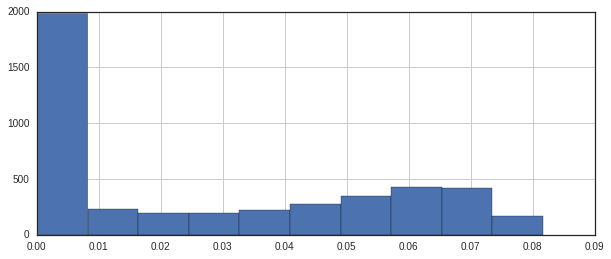

In [8]:
df_shapefile_provinces['Aegypti_ye'].hist();

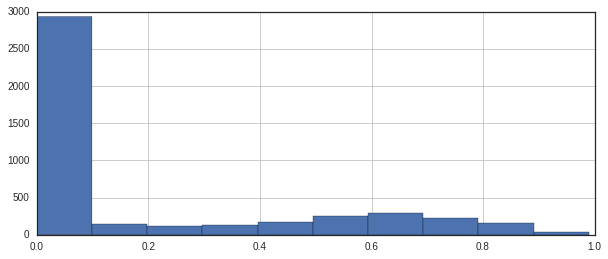

In [9]:
df_shapefile_provinces['Messinamea'].hist();

#### Some intermediate steps

In [10]:
col_Aegypti = filter(lambda k: ('Aegypti' in k), df_shapefile_provinces.columns.tolist())
col_Albopict = filter(lambda k: ('Albopict' in k), df_shapefile_provinces.columns.tolist())
col_combi = filter(lambda k: ('combi' in k), df_shapefile_provinces.columns.tolist())

In [11]:
col_Aegypti =  col_Aegypti[:-1]
# col_Albopict =  col_Albopict[:-1]
col_combi =  col_combi[:-1]

In [12]:
df_Aegypti = df_shapefile_provinces[col_Aegypti]
df_Albopict =  df_shapefile_provinces[col_Albopict]
df_combi =  df_shapefile_provinces[col_combi]

In [13]:
print df_Aegypti.values.max(), df_Albopict.values.max(), df_combi.values.max()

0.360577719273 0.525109006757 0.525109006757


#### Standardize data on Environmental suitability to a continous range from 0 to 1 

In [14]:
max_value = df_combi.values.max().copy()

In [15]:
df_Aegypti  = df_Aegypti / max_value
df_Albopict  = df_Albopict / max_value
df_combi  = df_combi / max_value

#### Visualize Monthly fluctuation of environmental suitability for Aedes Aegypti, Albopictus and both

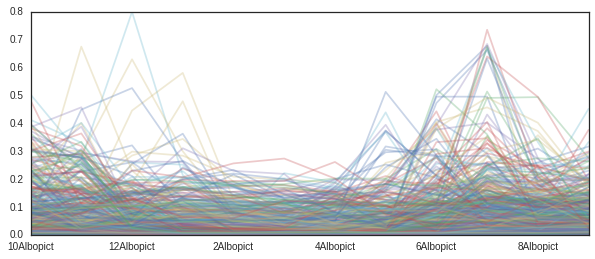

In [16]:
df_Albopict.sample(500).transpose().plot(legend=False, alpha=.3);

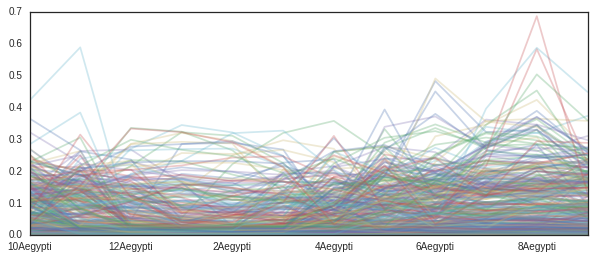

In [17]:
df_Aegypti.sample(500).transpose().plot(legend=False, alpha=.3);

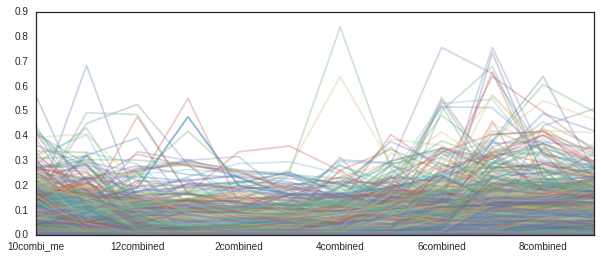

In [18]:
df_combi.sample(500).transpose().plot(legend=False, alpha=.3);

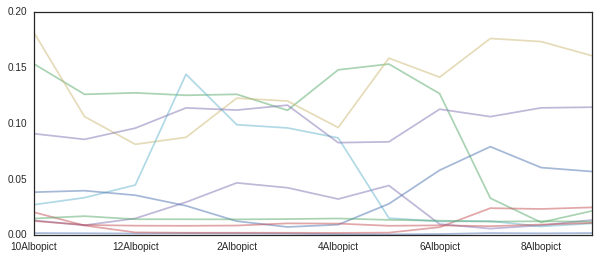

In [19]:
df_Albopict.sample(10).transpose().plot(legend=False, alpha=.5);

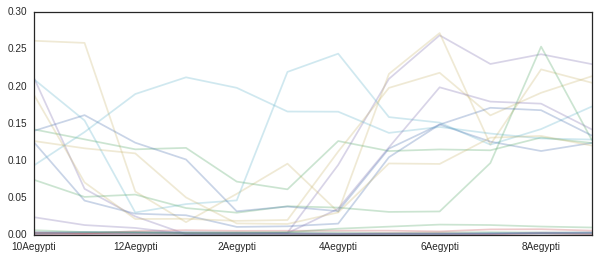

In [20]:
df_Aegypti.sample(20).transpose().plot(legend=False, alpha=.3);

In [21]:
df_shapefile_provinces.iloc[:, [0, 1,2,3,4,43]].head(1)

,adm0_a3,country,geometry,perc_pover,population,Messinamea
0,ABW,Aruba,POLYGON ((-69.99693762899992 12.57758209800004...,12.899919,87896.878144,0.226241


#### Merge standardized data again together and save it in new shapefile stored in 'preprocessing_results'

In [22]:
df_shapefile_provinces_norm01 = df_shapefile_provinces.iloc[:, [0,1,2,3,4,43]].join(df_Aegypti) ## DO NOT USE PD.MERGE with gp !!!!!


In [23]:
df_shapefile_provinces_norm01 = df_shapefile_provinces_norm01.join(df_Albopict) ## DO NOT USE PD.MERGE with gp !!!!!


In [24]:
df_shapefile_provinces_norm01 = df_shapefile_provinces_norm01.join(df_combi) ## DO NOT USE PD.MERGE with gp !!!!!


In [25]:
df_shapefile_provinces_norm01.head(1)

,adm0_a3,country,geometry,perc_pover,population,Messinamea,10Aegypti,11Aegypti,12Aegypti,1Aegypti,...,12combined,1combined,2combined,3combined,4combined,5combined,6combined,7combined,8combined,9combined
0,ABW,Aruba,POLYGON ((-69.99693762899992 12.57758209800004...,12.899919,87896.878144,0.226241,0.308523,0.305445,0.231323,0.109213,...,0.231323,0.145221,0.14083,0.134219,0.086828,0.103603,0.108477,0.100244,0.083086,0.1446


#### Save standardized values as shapefile

In [26]:
df_shapefile_provinces_norm01.population = df_shapefile_provinces_norm01.population.astype(float)
# Computing pregnancies throws errors if step is omit

In [27]:
import os
filename = 'preprocessing_results/geojson/provinces_monthly_norm01.geojson'
try:
    os.remove(filename)
except OSError:
    pass
df_shapefile_provinces_norm01.to_file(filename, driver="GeoJSON")